<a href="https://colab.research.google.com/github/JasmineHuang25/Rock_Scissors_Paper_Gmae/blob/main/New_INV_webapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web App Deployment

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow import keras

import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import seaborn as sns

import os
import cv2
from keras.preprocessing import image
from keras import utils

from PIL import Image

# Call the saved model

In [4]:
model = keras.models.load_model('/content/gdrive/MyDrive/rock_paper_scissors/MVP/All_Real_Img_INVmodel/New_INV_model.h5')

## Testing and validation

1/1 [==============================] - 1s 520ms/step
Scissor
[[4.0785587e-01 5.9214407e-01 1.7618393e-09]]


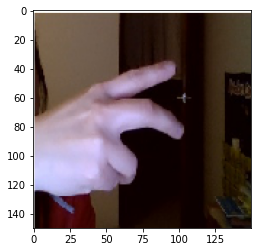

In [5]:
path = "/content/gdrive/MyDrive/Image/other_image/scissorshand012928.jpg"

img = utils.load_img(path,
                     target_size=(150, 150),
                     color_mode="rgb")

input_arr = utils.img_to_array(img)
input_arr = np.array([input_arr])

classes = model.predict(input_arr, batch_size=10)


for i in classes:
  if i[0] == 1:
    print("paper")
  elif i[1] == 1:
    print("Rock")
  else:
    print("Scissor")
        
plt.imshow(img)
print(classes)

# Web App deployment using Gradio

In [6]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [7]:
import gradio as gr

## Webcam version

In [8]:
def webcam(inp):

  image_i = cv2.bitwise_not(inp)    #invert color
  
  cap_img = image_i.reshape((-1, 150, 150, 3))

  prediction = model.predict(cap_img, batch_size=10)

  for i in prediction:
    if i[0] == 1:
      label = "Paper"
    elif i[1] == 1:
      label = "Rock"
    else:
      label = "Scissors"
  
  # Being in Rock-Scissors-Paper game
  choices = ['Rock', 'Paper', 'Scissors']
  user_move = label
  computer_move = random.choice(choices)
  guess_dict = {'Rock': 0, 'Paper': 1, 'Scissors':2}
  guess_idx = guess_dict.get(user_move, 3)
  computer_idx = guess_dict.get(computer_move)
  result_matrix = [[0,2,1], [1,0,2], [2,1,0]]
  result_idx = result_matrix[guess_idx][computer_idx]
  result_messages = ['It is a tie', 'You win!!! Congrats!', 'Sorry, you lose :(']
  result = result_messages[result_idx]
  output_text = f"The model recognizes your move is {user_move}.\nComputer's move is {computer_move}.\n{result}"
  
  if computer_move == 'Rock':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/ROCK.png'
    computer_move_img = utils.load_img(img_path, target_size=(600, 600))
  elif computer_move == 'Paper':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/PAPER.png'
    computer_move_img = utils.load_img(img_path, target_size=(600, 600))
  else:
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/SCISSORS.png'
    computer_move_img = utils.load_img(img_path, target_size=(600, 600))

  return computer_move_img, output_text, image_i

output1 = gr.Image(shape=(360,600), label="Computer's Move").style(height=360, width=600)
output2 = gr.Textbox(label='Game result')
output3 = gr.Image(shape=(360,600), label="This is what cumputer sees").style(height=360, width=600)

interface = gr.Interface(fn=webcam, 
             inputs=gr.Image(shape=(150, 150),
                             source='webcam',
                             streaming=True,
                             mirror_webcam=True,
                             invert_colors=False,
                             image_mode='RGB',
                             label='Please make your move CLOSE and CLEAR!!'),
             outputs=[output1, output2, output3],
             title="Rock-Scissors-Paper Image Game with Computer",
             live=False)

interface.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://93b6faa3-0408-4463.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 83ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://93b6faa3-0408-4463.gradio.live


## Insert/upload image version

In [ ]:
def classify_image(inp):

  image_i = cv2.bitwise_not(inp)    #invert color

  inp_arr = inp.reshape((1, 150, 150, 3))

  prediction = model.predict(inp_arr, batch_size=10)

  for i in prediction:
    if i[0] == 1:
      label = "Paper"
    elif i[1] == 1:
      label = "Rock"
    else:
      label = "Scissors"
  
  # Being in Rock-Scissors-Paper game
  choices = ['Rock', 'Paper', 'Scissors']
  user_move = label
  computer_move = random.choice(choices)
  guess_dict = {'Rock': 0, 'Paper': 1, 'Scissors':2}
  guess_idx = guess_dict.get(user_move, 3)
  computer_idx = guess_dict.get(computer_move)
  result_matrix = [[0,2,1], [1,0,2], [2,1,0]]
  result_idx = result_matrix[guess_idx][computer_idx]
  result_messages = ['It is a tie', 'You win!!! Congrats!', 'Sorry, you lose :(']
  result = result_messages[result_idx]
  output_text = f"The model recognizes your move is {user_move}.\nComputer's move is {computer_move}.\n{result}"

  if computer_move == 'Rock':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/ROCK.png'
    computer_move_img = utils.load_img(img_path, target_size=(300, 300))
  elif computer_move == 'Paper':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/PAPER.png'
    computer_move_img = utils.load_img(img_path, target_size=(300, 300))
  else:
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/SCISSORS.png'
    computer_move_img = utils.load_img(img_path, target_size=(300, 300))

  return computer_move_img, output_text, image_i

output1 = gr.Image(shape=(300,300), label="Computer's Move").style(height=360, width=600)
output2 = gr.Textbox(label='Game result')
output3 = gr.Image(shape=(360,600), label="This is what cumputer sees").style(height=360, width=600)

interface = gr.Interface(fn=webcam, 
             inputs=gr.Image(shape=(150, 150),
                             label='Insert your move/image here',
                             invert_colors=False),
             outputs=[output1, output2, output3],
             title="Rock-Scissors-Paper Image Game with Computer",
             live=False,
             examples=['/content/gdrive/MyDrive/rock_paper_scissors/MVP/Dataset/validation/rock/rock3.png',
                       '/content/gdrive/MyDrive/rock_paper_scissors/MVP/Dataset/validation/scissors/scissors4.png',
                       '/content/gdrive/MyDrive/rock_paper_scissors/MVP/Dataset/validation/paper/paper2.png'])

interface.launch(debug=True, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2495bbe3-e3f2-49bf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 30ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://2495bbe3-e3f2-49bf.gradio.live


# Remove background and invert color

In [9]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [10]:
from rembg import remove

1/1 [==============================] - 0s 80ms/step
Rock
[[9.4109430e-18 1.0000000e+00 4.8647605e-12]]


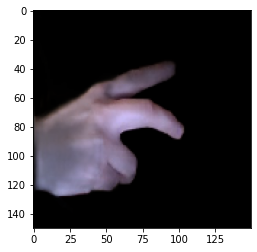

In [13]:
path = "/content/gdrive/MyDrive/Image/other_image/scissorshand012928.jpg"

img = utils.load_img(path, target_size=(150, 150))
# plt.imshow(img)

output = remove(img).convert('RGB')
# plt.imshow(output)

input_arr = utils.img_to_array(output)

input_arr = np.array([input_arr])
# input_arr.shape

classes = model.predict(input_arr, batch_size=10)

for i in classes:
  if i[0] == 1:
    print("paper")
  elif i[1] == 1:
    print("Rock")
  else:
    print("Scissor")

print(classes)
plt.imshow(output)

## Web app with background removed and color inverted images 

In [12]:
def webcam(inp):

  img_nobk = remove(inp)  # Remove background
  img_convert = Image.fromarray(img_nobk).convert('RGB')  # Convert RGBA to RGB
  
  input_arr = utils.img_to_array(img_convert)  # Shape should be (150, 150, 3)
  img_arr = np.array([input_arr])  # The shape should be (1, 150, 150, 3)
  
  prediction = model.predict(img_arr, batch_size=10)

  for i in prediction:
    if i[0] == 1:
      label = "Paper"
    elif i[1] == 1:
      label = "Rock"
    else:
      label = "Scissors"
  
 # Being in Rock-Scissors-Paper game
  choices = ['Rock', 'Paper', 'Scissors']
  user_move = label
  computer_move = random.choice(choices)
  guess_dict = {'Rock': 0, 'Paper': 1, 'Scissors':2}
  guess_idx = guess_dict.get(user_move, 3)
  computer_idx = guess_dict.get(computer_move)
  result_matrix = [[0,2,1], [1,0,2], [2,1,0]]
  result_idx = result_matrix[guess_idx][computer_idx]
  result_messages = ['It is a tie', 'You win!!! Congrats!', 'Sorry, you lose :(']
  result = result_messages[result_idx]
  output_text = f"The model recognizes your move is {user_move}.\nComputer's move is {computer_move}.\n{result}"
  
  if computer_move == 'Rock':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/ROCK.png'
    computer_move_img = utils.load_img(img_path, target_size=(600, 600))
  elif computer_move == 'Paper':
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/PAPER.png'
    computer_move_img = utils.load_img(img_path, target_size=(600, 600))
  else:
    img_path = '/content/gdrive/MyDrive/rock_paper_scissors/MVP/computer_move_images/SCISSORS.png'
    computer_move_img = utils.load_img(img_path, target_size=(600, 600))

  return computer_move_img, output_text, img_nobk

output1 = gr.Image(shape=(360,600), label="Computer's Move").style(height=360, width=600)
output2 = gr.Textbox(label='Game result')
output3 = gr.Image(shape=(360,600), label="This is what cumputer sees").style(height=360, width=600)

interface = gr.Interface(fn=webcam, 
             inputs=gr.Image(shape=(150, 150),
                             source='webcam',
                             streaming=True,
                             mirror_webcam=True,
                             invert_colors=True,
                             image_mode='RGB',
                             label='Please make your move CLOSE and CLEAR!!'),
             outputs=[output1, output2, output3],
             title="Rock-Scissors-Paper Image Game with Computer",
             live=False)

interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d356792a-5b9d-4c72.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 76ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d356792a-5b9d-4c72.gradio.live


# Conclusion:
Model can't predict images with background removed well since it hasn't been trained with background removed images.  Will lunch the webcam image capturing version.

Note: Model was trained with color inverted images.  Shall invert color for the input images as well. 